In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Introduction

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo(id="BYOK12I9vgI", width="100%")

In this chapter, we will look at bipartite graphs and their applications.

## What are bipartite graphs?

As the name suggests,
bipartite have two (bi) node partitions (partite).
In other words, we can assign nodes to one of the two partitions.
(By contrast, all of the graphs that we have seen before are _unipartite_:
they only have a single partition.)

## Examples 
customers and items purchased
> customer A cannot be purchasing customer B !! 

students and courses registered

### Rules for bipartite graphs

With unipartite graphs, you might remember a few rules that apply.

Firstly, nodes and edges belong to a _set_.
This means the node set contains only unique members,
i.e. no node can be duplicated.
The same applies for the edge set.

On top of those two basic rules, bipartite graphs add an additional rule:
Edges can only occur between nodes of **different** partitions.
In other words, nodes within the same partition 
are not allowed to be connected to one another.

### Applications of bipartite graphs

Where do we see bipartite graphs being used?
Here's one that is very relevant to e-commerce,
which touches our daily lives:

> We can model customer purchases of products using a bipartite graph.
> Here, the two node sets are **customer** nodes and **product** nodes,
> and edges indicate that a customer $C$ purchased a product $P$.

On the basis of this graph, we can do interesting analyses,
such as finding customers that are similar to one another
on the basis of their shared product purchases.

Can you think of other situations
where a bipartite graph model can be useful?

## Dataset

Here's another application in crime analysis,
which is relevant to the example that we will use in this chapter:

> This bipartite network contains persons
> who appeared in at least one crime case 
> as either a suspect, a victim, a witness 
> or both a suspect and victim at the same time. 
> A left node represents a person and a right node represents a crime. 
> An edge between two nodes shows that 
> the left node was involved in the crime 
> represented by the right node.

This crime dataset was also sourced from Konect.

In [3]:
import sys
if not (r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple' in sys.path):
    sys.path.insert(0, r'C:\Users\pui_s\Documents\concordia-bootcamps\Network-Analysis-Made-Simple')
from nams import load_data as cf
G = cf.load_crime_network()
for n, d in G.nodes(data=True):
    G.nodes[n]["degree"] = G.degree(n)

If you inspect the nodes,
you will see that they contain a special metadata keyword: `bipartite`.
This is a special keyword that NetworkX can use 
to identify nodes of a given partition.

In [8]:
list(G.edges(data=True))[:5]

[('p1', 'c1', {'role': 'Suspect'}),
 ('p1', 'c2', {'role': 'Victim'}),
 ('p1', 'c3', {'role': 'Victim'}),
 ('p1', 'c4', {'role': 'Suspect'}),
 ('c1', 'p756', {'role': 'Suspect'})]

In [9]:
list(G.nodes(data=True))[:10]

[('p1', {'bipartite': 'person', 'gender': 1, 'degree': 4}),
 ('c1', {'bipartite': 'crime', 'degree': 2}),
 ('c2', {'bipartite': 'crime', 'degree': 2}),
 ('c3', {'bipartite': 'crime', 'degree': 2}),
 ('c4', {'bipartite': 'crime', 'degree': 2}),
 ('p2', {'bipartite': 'person', 'gender': 1, 'degree': 22}),
 ('c5', {'bipartite': 'crime', 'degree': 2}),
 ('c6', {'bipartite': 'crime', 'degree': 3}),
 ('c7', {'bipartite': 'crime', 'degree': 1}),
 ('c8', {'bipartite': 'crime', 'degree': 2})]

Note that `'bipartite'` is what the `nx` looks for when making graph

### Visualize the crime network

To help us get our bearings right, let's visualize the crime network.

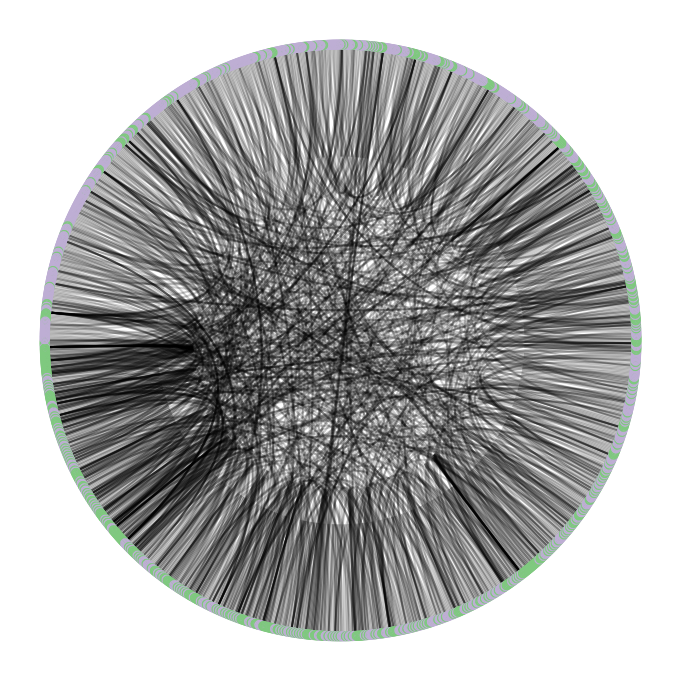

In [7]:
import nxviz as nv
import matplotlib.pyplot as plt

# fig, ax = plt.subplots(figsize=(7, 7))
c = nv.CircosPlot(G, sort="degree", group="bipartite", node_color="bipartite", node_aes_kwargs={"size_scale": 3})
c.draw()

### Exercise: Extract each node set

A useful thing to be able to do
is to extract each partition's node set.
This will become handy when interacting with
NetworkX's bipartite algorithms later on.

> Write a function that extracts all of the nodes 
> from specified node partition.
> It should also raise a plain Exception
> if no nodes exist in that specified partition.
> (as a precuation against users putting in invalid partition names).

In [10]:
import networkx as nx

def extract_partition_nodes(G: nx.Graph, partition: str):
    nodeset = [n for n, d in G.nodes(data=True) if d['bipartite'] == partition]
    if len(nodeset) == 0:
        raise Exception(f"No nodes exist in the partition {partition}!")
    return nodeset

In [11]:
from nams.solutions.bipartite import extract_partition_nodes
# Uncomment the next line to see the answer.
extract_partition_nodes??

Signature: extract_partition_nodes(G: networkx.classes.graph.Graph, partition: str)
Docstring: <no docstring>
Source:   
def extract_partition_nodes(G: nx.Graph, partition: str):
    nodeset = [n for n, d in G.nodes(data=True) if d["bipartite"] == partition]
    if len(nodeset) == 0:
        raise Exception(f"No nodes exist in the partition {partition}!")
    return nodeset
File:      c:\users\pui_s\documents\concordia-bootcamps\network-analysis-made-simple\nams\solutions\bipartite.py
Type:      function


## Bipartite Graph Projections

In a bipartite graph, one task that can be useful to do
is to calculate the projection of a graph onto one of its nodes.

What do we mean by the "projection of a graph"?
It is best visualized using this figure:

In [13]:
from nams.solutions.bipartite import draw_bipartite_graph_example, bipartite_example_graph
# from nxviz import annotate
import matplotlib.pyplot as plt

bG = bipartite_example_graph()
pG = nx.bipartite.projection.projected_graph(bG, "abcd")
ax = draw_bipartite_graph_example()
plt.sca(ax[0])
annotate.parallel_labels(bG, group_by="bipartite")
plt.sca(ax[1])
annotate.arc_labels(pG)

ImportError: cannot import name 'annotate' from 'nxviz' (C:\Users\pui_s\AppData\Local\Programs\Python\Python39\lib\site-packages\nxviz\__init__.py)

As shown in the figure above, we start first with a bipartite graph with two node sets,
the "alphabet" set and the "numeric" set.
The projection of this bipartite graph onto the "alphabet" node set
is a graph that is constructed such that it only contains the "alphabet" nodes,
and edges join the "alphabet" nodes because they share a connection to a "numeric" node.
The red edge on the right
is basically the red path traced on the left.

### Computing graph projections

How does one compute graph projections using NetworkX?
Turns out, NetworkX has a `bipartite` submodule,
which gives us all of the facilities that we need
to interact with bipartite algorithms.

First of all, we need to check that the graph
is indeed a bipartite graph.
NetworkX provides a function for us to do so:

In [ ]:
from networkx.algorithms import bipartite

bipartite.is_bipartite(G)

Now that we've confirmed that the graph is indeed bipartite,
we can use the NetworkX bipartite submodule functions
to generate the bipartite projection onto one of the node partitions.

First off, we need to extract nodes from a particular partition.

In [ ]:
person_nodes = extract_partition_nodes(G, "person")
crime_nodes = extract_partition_nodes(G, "crime")

Next, we can compute the projection:

In [ ]:
person_graph = bipartite.projected_graph(G, person_nodes)
crime_graph = bipartite.projected_graph(G, crime_nodes)

And with that, we have our projected graphs!

Go ahead and inspect them:

In [ ]:
list(person_graph.edges(data=True))[0:5]

In [ ]:
list(crime_graph.edges(data=True))[0:5]

Now, what is the _interpretation_ of these projected graphs?

- For `person_graph`, we have found _individuals who are linked by shared participation (whether witness or suspect) in a crime._
- For `crime_graph`, we have found _crimes that are linked by shared involvement by people._

Just by this graph, we already can find out pretty useful information.
Let's use an exercise that leverages what you already know
to extract useful information from the projected graph.

### Exercise: find the crime(s) that have the most shared connections with other crimes

> Find crimes that are most similar to one another
> on the basis of the number of shared connections to individuals.

_Hint: This is a degree centrality problem!_

In [ ]:
import pandas as pd

def find_most_similar_crimes(cG: nx.Graph):
    """
    Find the crimes that are most similar to other crimes.
    """
    dcs = ______________
    return ___________________


from nams.solutions.bipartite import find_most_similar_crimes
find_most_similar_crimes(crime_graph)

### Exercise: find the individual(s) that have the most shared connections with other individuals

> Now do the analogous thing for individuals!

In [ ]:
def find_most_similar_people(pG: nx.Graph):
    """
    Find the persons that are most similar to other persons.
    """
    dcs = ______________
    return ___________________


from nams.solutions.bipartite import find_most_similar_people
find_most_similar_people(person_graph)

## Weighted Projection

Though we were able to find out which graphs were connected with one another,
we did not record in the resulting projected graph
the **strength** by which the two nodes were connected.
To preserve this information, we need another function:

In [ ]:
weighted_person_graph = bipartite.weighted_projected_graph(G, person_nodes)
list(weighted_person_graph.edges(data=True))[0:5]

### Exercise: Find the people that can help with investigating a `crime`'s `person`.

Let's pretend that we are a detective trying to solve a crime,
and that we right now need to find other individuals
who were not implicated in the same _exact_ crime as an individual was,
but who might be able to give us information about that individual
because they were implicated in other crimes with that individual.

> Implement a function that takes in a bipartite graph `G`, a string `person` and a string `crime`,
> and returns a list of other `person`s that were **not** implicated in the `crime`,
> but were connected to the `person` via other crimes.
> It should return a _ranked list_,
> based on the **number of shared crimes** (from highest to lowest)
> because the ranking will help with triage.

In [ ]:
list(G.neighbors('p1'))

In [ ]:
def find_connected_persons(G, person, crime):
    # Step 0: Check that the given "person" and "crime" are connected.
    if _____________________________:
        raise ValueError(f"Graph does not have a connection between {person} and {crime}!")

    # Step 1: calculate weighted projection for person nodes.
    person_nodes = ____________________________________
    person_graph = bipartite.________________________(_, ____________)
    
    # Step 2: Find neighbors of the given `person` node in projected graph.
    candidate_neighbors = ___________________________________
    
    # Step 3: Remove candidate neighbors from the set if they are implicated in the given crime.
    for p in G.neighbors(crime):
        if ________________________:
            _____________________________
    
    # Step 4: Rank-order the candidate neighbors by number of shared connections.
    _________ = []
    ## You might need a for-loop here
    return pd.DataFrame(__________).sort_values("________", ascending=False)


from nams.solutions.bipartite import find_connected_persons
find_connected_persons(G, 'p2', 'c10')

## Degree Centrality

The degree centrality metric is something we can calculate for bipartite graphs.
Recall that the degree centrality metric is the number of neighbors of a node
divided by the total number of _possible_ neighbors.

In a unipartite graph, the denominator can be the total number of nodes less one
(if self-loops are not allowed)
or simply the total number of nodes (if self loops _are_ allowed).

### Exercise: What is the denominator for bipartite graphs?

Think about it for a moment, then write down your answer.

In [ ]:
from nams.solutions.bipartite import bipartite_degree_centrality_denominator
from nams.functions import render_html
render_html(bipartite_degree_centrality_denominator())

### Exercise: Which `persons` are implicated in the most number of crimes?

> Find the `persons` (singular or plural) who are connected to the most number of crimes.

To do so, you will need to use `nx.bipartite.degree_centrality`,
rather than the regular `nx.degree_centrality` function.

`nx.bipartite.degree_centrality` requires that you pass in
a node set from one of the partitions
so that it can correctly partition nodes on the other set.
What is returned, though, is the degree centrality
for nodes in both sets.
Here is an example to show you how the function is used:

```python
dcs = nx.bipartite.degree_centrality(my_graph, nodes_from_one_partition)
```

In [ ]:
def find_most_crime_person(G, person_nodes):
    dcs = __________________________
    return ___________________________

from nams.solutions.bipartite import find_most_crime_person
find_most_crime_person(G, person_nodes)

## Solutions

Here are the solutions to the exercises above.

In [ ]:
from nams.solutions import bipartite
import inspect

print(inspect.getsource(bipartite))